# Question 1

Considere uma rede deep learning convolutiva (treinada) aplicada à lassificação de padrões em imagens. A base de dados considerada é a CIFAR-10 (pesquise). A referida base de dados consiste de 60 mil imagens coloridas de 32x32 pixels, com 50 mil para treino e 10 mil para teste. As imagens estão divididas em 10 classes, a saber: avião, navio, caminhão, automóvel, sapo, pássaro, cachorro, gato, cavalo e cervo. Cada imagem possui apenas um dos objetos da classe de interesse, podendo estar parcialmente obstruído por outros objetos que não pertençam a esse conjunto. Apresente o desempenho da rede no processo de classificação usando uma matriz de confusão.

In [21]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

## Load the CIFAR-10 dataset

In [22]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [23]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


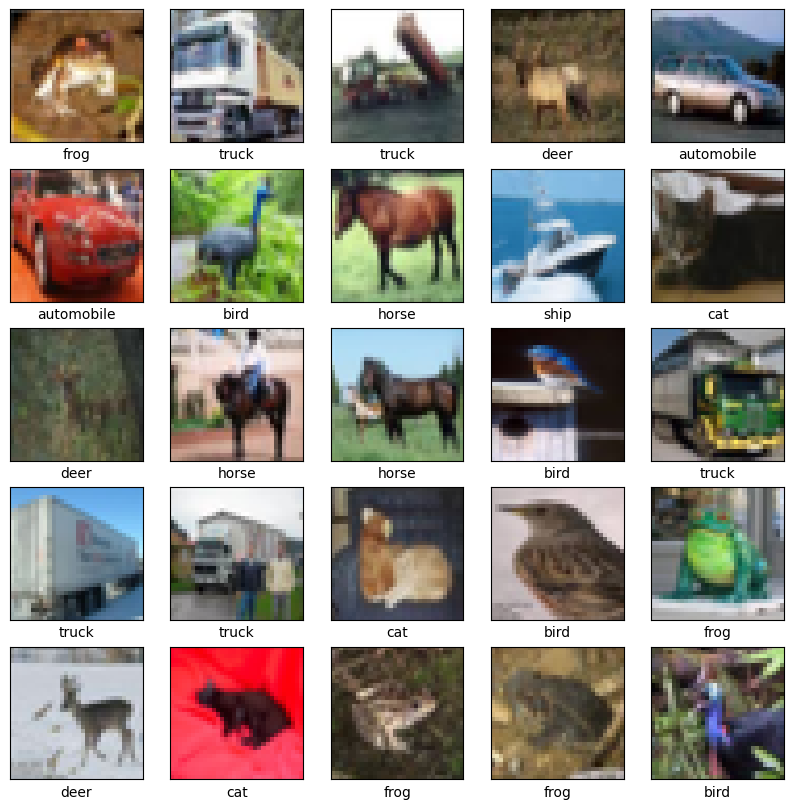

In [24]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize a few examples from the dataset
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


In [25]:
x_train.dtype

dtype('uint8')

In [26]:
x_test.dtype

dtype('uint8')

## Preprocess the data

In [27]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [28]:
x_train /= 255.0
x_test /= 255.0

In [29]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Define the model architecture

In [30]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


## Compile the model

In [31]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

##  Callbacks

In [32]:
checkpoint = ModelCheckpoint('model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

## Train the model

In [33]:
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=50,
                    batch_size=64,
                    callbacks=[checkpoint, early_stopping])

Epoch 1/50
782/782 [==============================] - 18s 15ms/step - loss: 1.6156 - accuracy: 0.4467 - val_loss: 1.3745 - val_accuracy: 0.5243
Epoch 2/50
782/782 [==============================] - 11s 14ms/step - loss: 1.0625 - accuracy: 0.6253 - val_loss: 0.9983 - val_accuracy: 0.6463
Epoch 3/50
782/782 [==============================] - 10s 13ms/step - loss: 0.8831 - accuracy: 0.6917 - val_loss: 0.8649 - val_accuracy: 0.6995
Epoch 4/50
782/782 [==============================] - 10s 13ms/step - loss: 0.7792 - accuracy: 0.7275 - val_loss: 0.7868 - val_accuracy: 0.7261
Epoch 5/50
782/782 [==============================] - 11s 15ms/step - loss: 0.7107 - accuracy: 0.7524 - val_loss: 0.6399 - val_accuracy: 0.7826
Epoch 6/50
782/782 [==============================] - 11s 14ms/step - loss: 0.6557 - accuracy: 0.7750 - val_loss: 0.7834 - val_accuracy: 0.7398
Epoch 7/50
782/782 [==============================] - 10s 13ms/step - loss: 0.6062 - accuracy: 0.7914 - val_loss: 0.6496 - val_accuracy:

## Evaluate the model on the test set

In [34]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4510 - accuracy: 0.8579 - 1s/epoch - 3ms/step

Test accuracy: 0.8579000234603882


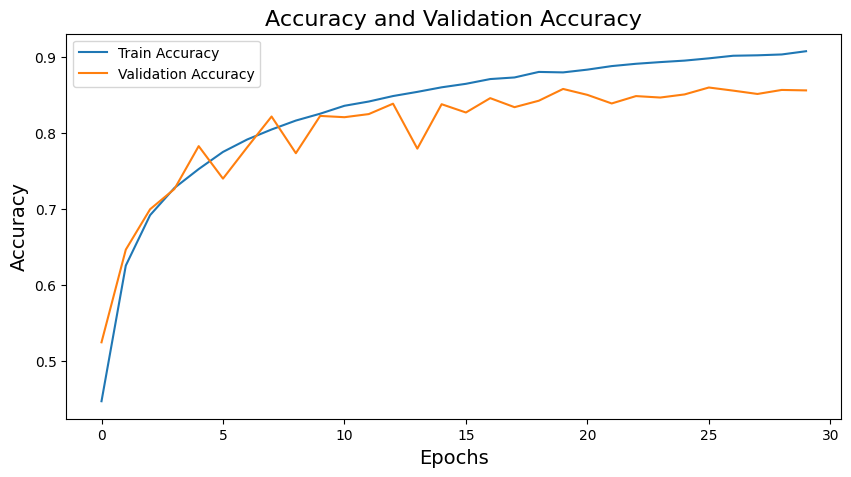

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy and Validation Accuracy', fontsize=16)
plt.legend()
plt.show()

## Make predictions on the test set

In [40]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


## Convert predictions from one-hot encoding to class labels

In [41]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

## Create a confusion matrix

In [42]:
cm = confusion_matrix(y_true_classes, y_pred_classes)

## Print the confusion matrix

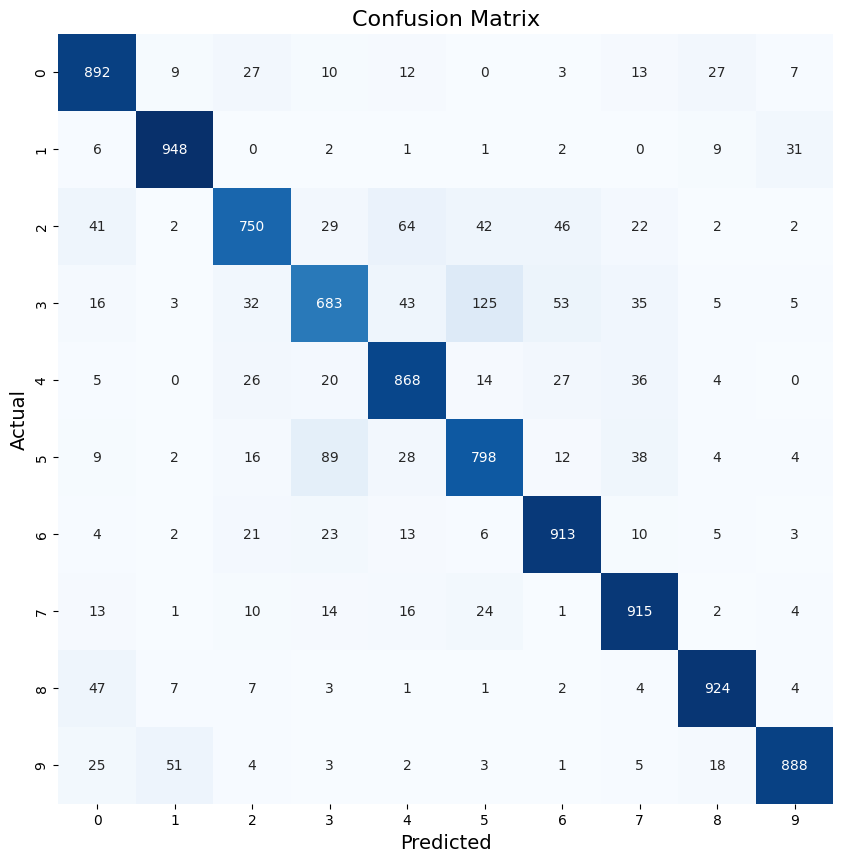

In [45]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()